In [69]:
import sys
import os
from importlib import reload
import numpy as np
import pylab as pl

sys.path.insert(0, '../src')
import datasetGen.preprocessor as prep
import utils.geofunctions as gf

reload(prep)

%matplotlib inline

In [70]:
DATA_DIR = "../data"
#raster_file = os.path.join(DATA_DIR, "Landsat8_225-64_17-07-2016-R6G5B4.tif")
raster_file = os.path.join(DATA_DIR, "Landsat8_225-64_17-07-2016-B1-7.tif")
vector_shp = os.path.join(DATA_DIR, "PRODES2016_225-64_REP.shp")
class_column = "agregClass"

In [71]:
preproc = prep.Preprocessor(raster_file, vector_shp)

parameters = {
    "ndvi": {
        #"raster": "self",
        "idx_b_red": 3,
        "idx_b_nir": 4
    }
}

ndvi = preproc.compute_indexes(["ndvi"], parameters)
print(ndvi.shape)

Computing NDVI
7
(7741, 7591, 7)


../src/datasetGen/preprocessor.py:13: RuntimeWarning: invalid value encountered in true_divide
  ndvi = np.divide((nir-red),(nir+red))


(7741, 7591, 8)
(7741, 7591, 8)


(-0.5, 7590.5, 7740.5, -0.5)

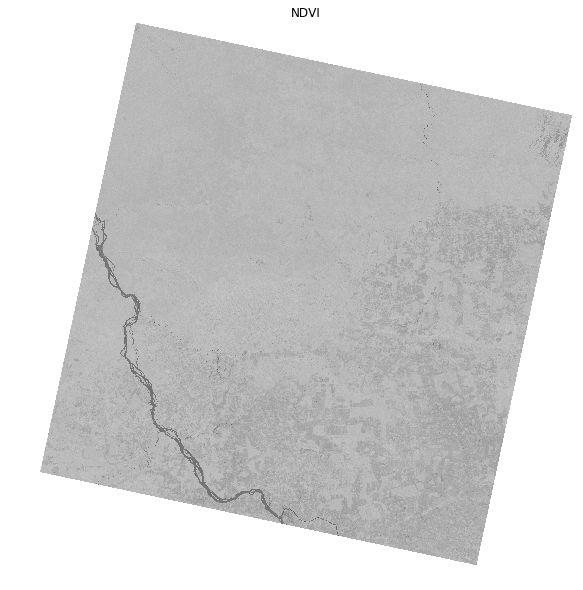

In [74]:
pl.figure(figsize=(10,10))
pl.title('NDVI')
#raster_img = skimage.img_as_float(raster_img).astype(np.float32)
pl.imshow(ndvi[:,:,ndvi.shape[2]-1], cmap="gray")
pl.axis('off')